Importe de bibliotecas e formatando saídas

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import pandas as pd
import numpy as np

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

Importe dos dados e inicio das análises

In [2]:
dados = pd.read_csv ('C:/Users/siqan/Documents/Estudos/PETR4.SA.csv')

#começando a análise básica dos dados
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,5.550,5.550,5.550,5.550,3.601876,2.886144e+10
1,2000-01-05,5.494,5.494,5.494,5.494,3.565535,4.303360e+10
2,2000-01-06,5.475,5.475,5.475,5.475,3.553203,3.405568e+10
3,2000-01-07,5.500,5.500,5.500,5.500,3.569429,2.091264e+10
4,2000-01-10,5.613,5.613,5.613,5.613,3.642763,1.956352e+10


In [3]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5405.000000,5405.000000,5405.000000,5405.000000,5405.000000,5.405000e+03
mean,18.288841,18.557039,17.996386,18.258484,14.590278,5.859542e+08
std,9.455943,9.602501,9.286727,9.419684,7.829066,4.037063e+09
min,4.200000,4.270000,4.120000,4.200000,2.839318,0.000000e+00
25%,9.650000,9.837500,9.487500,9.610000,7.215872,2.055360e+07
50%,18.350000,18.610001,18.040001,18.299999,14.889009,3.194760e+07
75%,24.500000,24.900000,24.100000,24.430000,20.195480,5.110550e+07
max,67.500000,67.500000,51.950001,52.509998,38.248531,7.356416e+10


In [4]:
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.Date.min(), dados.Date.max()))

Início do Período de Tempo: 2000-01-04
Final do Período de Tempo: 2021-07-12


In [5]:
# Verificando os tipo de dados presente
dados.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
#Transformando o tipo para os dados de data 
dados['Date'] = pd.to_datetime(dados['Date'], format = '%Y-%m')
dados.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [7]:
# Visualizando os Dados
dados=dados.fillna(method='ffill')

In [8]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('Date').drop(columns=['Volume'])
dados_serie.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-04,5.550,5.550,5.550,5.550,3.601876
2000-01-05,5.494,5.494,5.494,5.494,3.565535
2000-01-06,5.475,5.475,5.475,5.475,3.553203
2000-01-07,5.500,5.500,5.500,5.500,3.569429
2000-01-10,5.613,5.613,5.613,5.613,3.642763


In [9]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

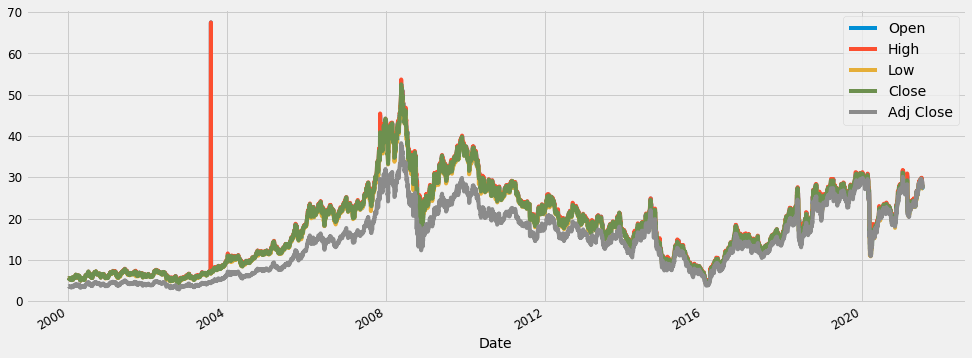

In [10]:
# Plot da série temporal
dados_serie.plot(figsize = (15, 6))
plt.show()

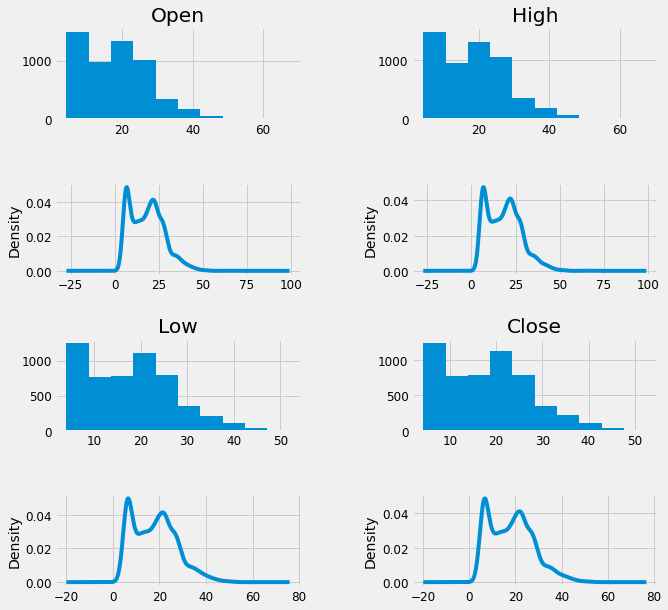

In [11]:
# Gráfico de Densidade

plt.figure(constrained_layout = True,figsize=(10,10),tight_layout=True)

plt.subplot(421)
dados_serie.Open.hist()
plt.title("Open")

plt.subplot(423)
dados_serie.Open.plot(kind = 'kde')

plt.subplot(422)
dados_serie.High.hist()
plt.title("High")

plt.subplot(424)
dados_serie.High.plot(kind = 'kde')
plt.grid(True)

plt.subplot(425)
dados_serie.Low.hist()
plt.title("Low")

plt.subplot(427)
dados_serie.Low.plot(kind = 'kde')

plt.subplot(426)
dados_serie.Close.hist()
plt.title("Close")

plt.subplot(428)
dados_serie.Close.plot(kind = 'kde')

plt.show()

<AxesSubplot:xlabel='Date', ylabel='Close'>

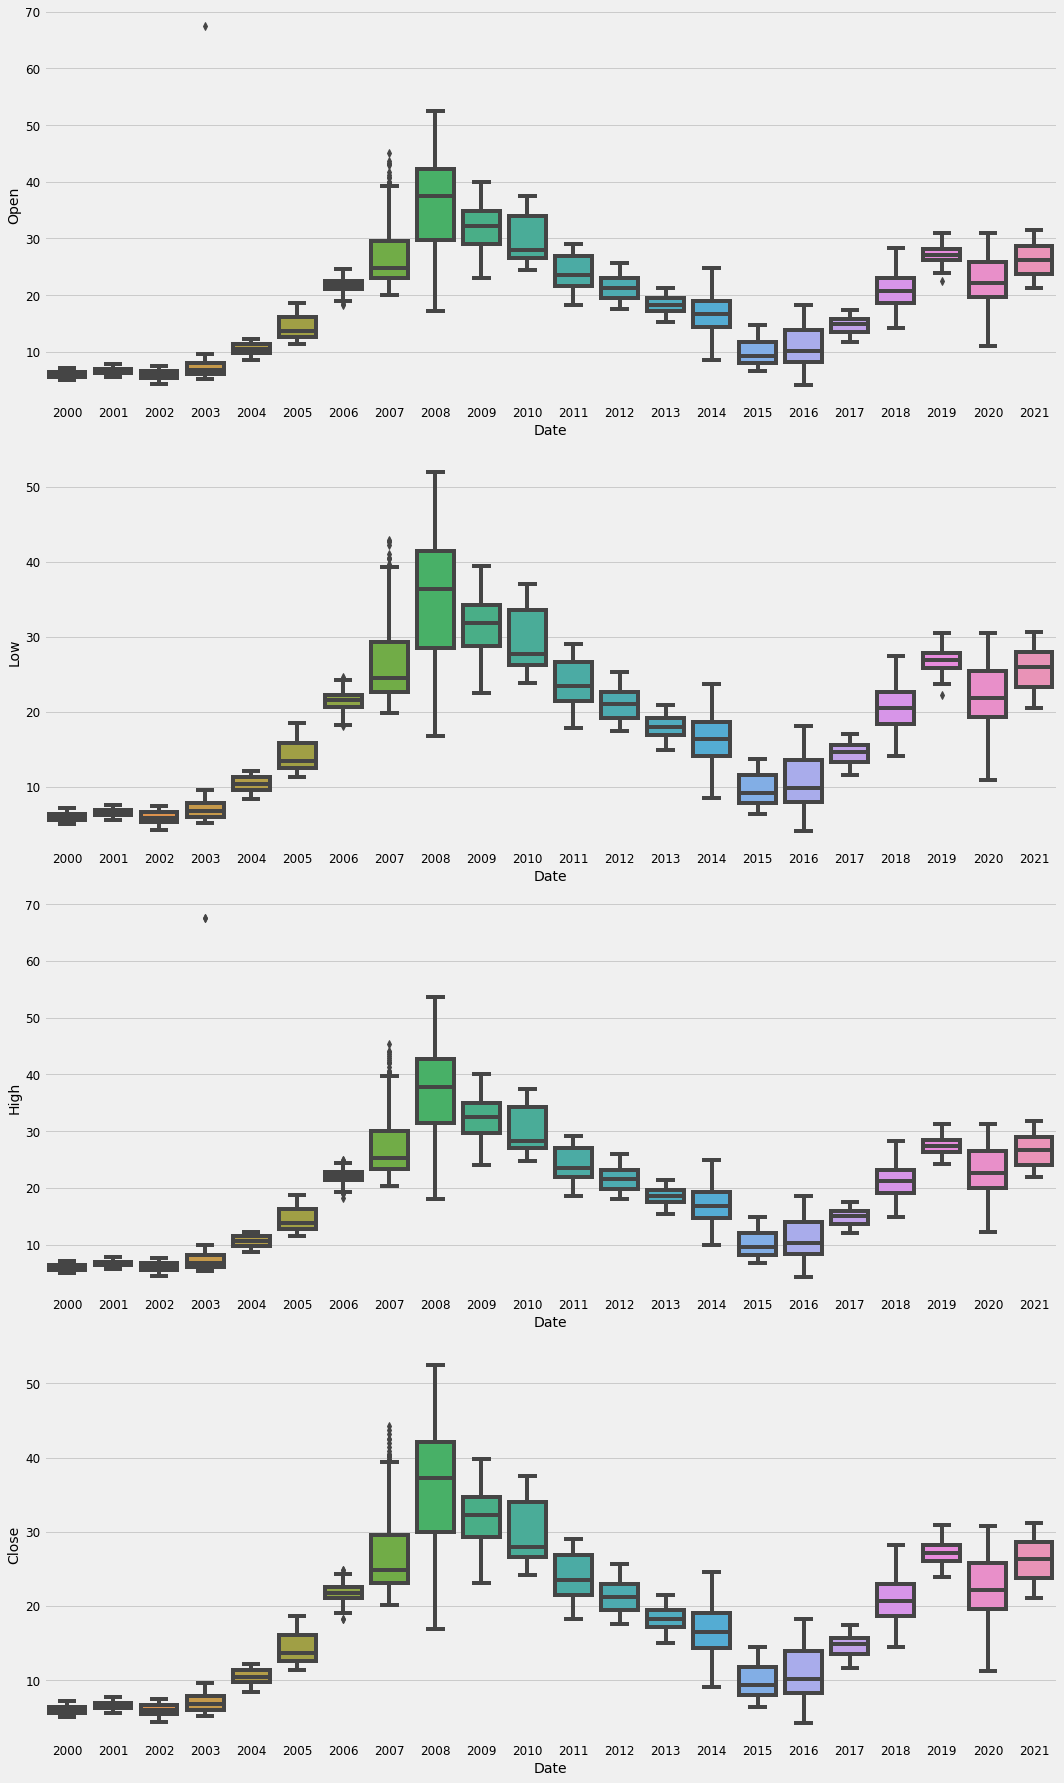

In [12]:
# Define a área de plotagem para os subplots (os boxplots)
fig, axes = plt.subplots(4,1,figsize=(15,25),tight_layout=True)

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(dados_serie.Open.index.year, dados_serie.Open, ax = axes[0])
sns.boxplot(dados_serie.Low.index.year, dados_serie.Low, ax = axes[1])
sns.boxplot(dados_serie.High.index.year, dados_serie.High, ax = axes[2])
sns.boxplot(dados_serie.Close.index.year, dados_serie.Close, ax = axes[3])

## Estacionariedade

In [13]:
#Primeiramente, vamos criar bases onde so teremos um valor para cada data!
dados_open = dados[['Date','Open']]
dados_low = dados[['Date','Low']]
dados_high = dados[['Date','High']]
dados_close = dados[['Date','Close']]

dados_serie_open = pd.DataFrame(dados_serie['Open'])



Text(0.5, 1.0, 'Estatísticas Móveis - Média e Desvio Padrão - Open')

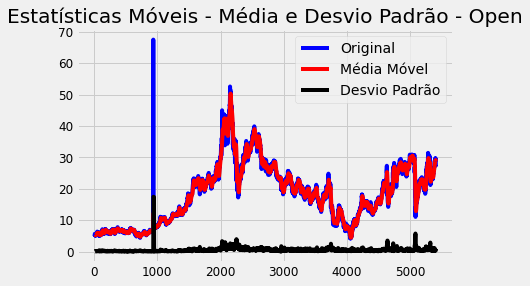

In [14]:
#Verificando a estacionariedade
#Plot das Rolling Statistics

# Prepara os dados
x = dados_open['Date'].values
y = dados_open['Open'].values

# Determinando estatísticas móveis
rolmean = dados_open.rolling(window = 12).mean()
rolstd = dados_open.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão - Open')

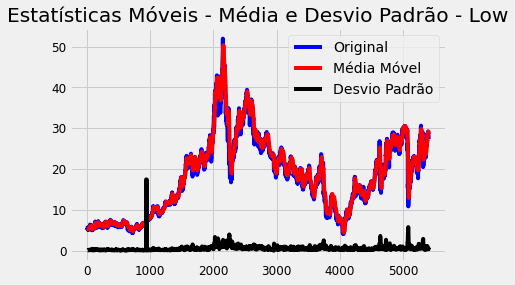

In [15]:
#Verificando a estacionariedade
#Plot das Rolling Statistics

# Prepara os dados
x = dados_low['Date'].values
y = dados_low['Low'].values

# Determinando estatísticas móveis
rolmean = dados_open.rolling(window = 12).mean()
rolstd = dados_open.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão - Low')
plt.show()

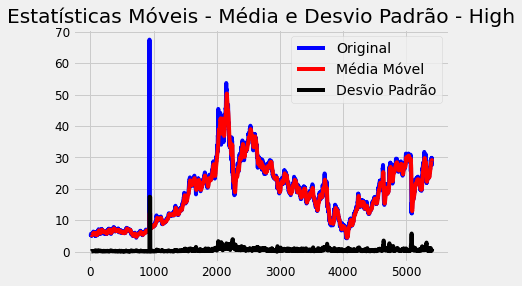

In [16]:
#Verificando a estacionariedade
#Plot das Rolling Statistics

# Prepara os dados
x = dados_high['Date'].values
y = dados_high['High'].values

# Determinando estatísticas móveis
rolmean = dados_open.rolling(window = 12).mean()
rolstd = dados_open.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão - High')
plt.show()

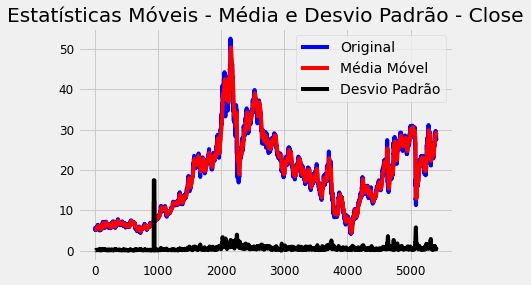

In [17]:
#Verificando a estacionariedade
#Plot das Rolling Statistics

# Prepara os dados
x = dados_close['Date'].values
y = dados_close['Close'].values

# Determinando estatísticas móveis
rolmean = dados_open.rolling(window = 12).mean()
rolstd = dados_open.rolling(window = 12).std()

# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão - Close')
plt.show()

## Autocorrelação com Gráficos ACF e PACF

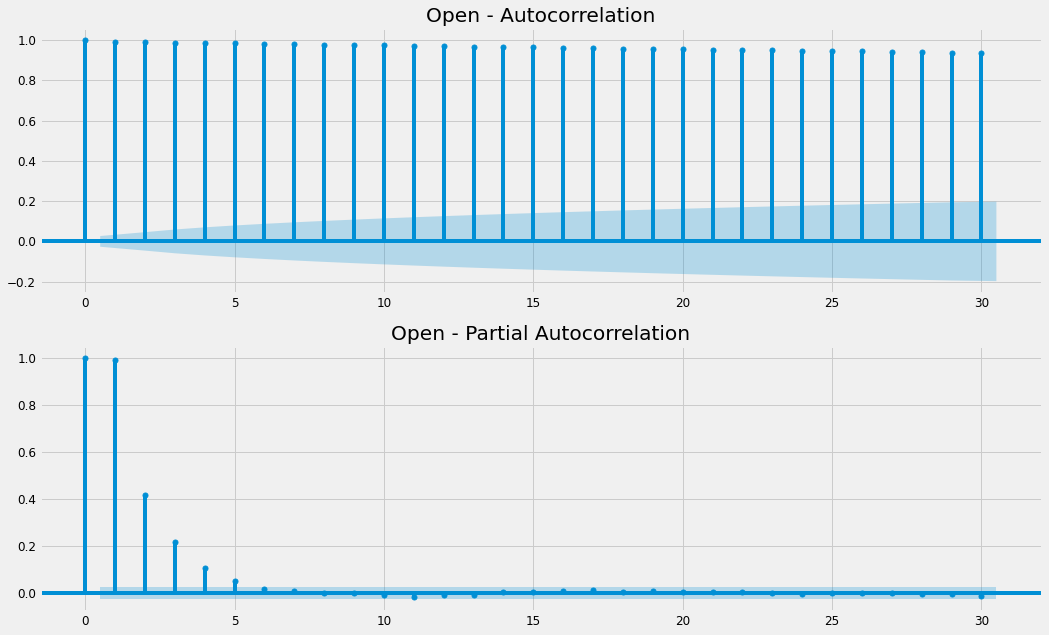

In [18]:
#Autocorrelação com Gráficos ACF e PACF

# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

#indexedDataset = dados_serie.fillna(method='ffill')

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(dados_serie.Open, ax = plt.gca(), lags = 30)
plt.title("Open - Autocorrelation")

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(dados_serie.Open, ax = plt.gca(), lags = 30)
plt.title("Open - Partial Autocorrelation")
plt.show()

## Teste Dickey-Fuller

In [20]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

#indexedDataset = dados_serie.fillna(method='ffill')

# Teste
dados_teste = adfuller(dados_serie.Open, autolag = 'AIC')

# Formatando a saída
dados_saida = pd.Series(dados_teste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dados_teste[4].items():
    dados_saida['Valor Crítico (%s)'%key] = value

# Print
print (dados_saida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -2.210136
Valor-p                            0.202587
Número de Lags Consideradas        5.000000
Número de Observações Usadas    5404.000000
Valor Crítico (1%)                -3.431561
Valor Crítico (5%)                -2.862075
Valor Crítico (10%)               -2.567055
dtype: float64
